## Here we create nice plots of our sources

In [230]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from astropy.io import fits

### Definition of limits of the grid/ figure

In [231]:
## Define the coordinates of the center of the grid
#latitude and longitue in galactic coordinates 
#longitude in l, latitude in b
# longitude is the x-like coordinate, latitude is the y-like coordinate

#the center is at the position of source J2212.5+0703

centerl = 68.7423
centerb = - 38.5648

#Having the position of the center, we can define the limits in x and y. Remember, the grid is defined as +/- 10 degrees 
#from the center

#First, let's make a choice for the coordinates of the upper left point 
#We define it to be 10 degrees of in each direction 

upx = centerl + 5.0 
upy = centerb + 5.0

#Now, find the other limits

lowx = upx - 10.0
lowy = upy - 10.0

### Read data from the fits files

In [232]:
hdulist1 = fits.open('30GeV_Fermi_NFWextended_025_PSF_res.fits')

figdata1 = hdulist1[0].data

hdulist2 = fits.open('30GeV_Fermi_CentralPointSource_PSF_res.fits')

figdata2 = hdulist2[0].data

hdulist3 = fits.open('30GeV_Fermi_TwoSources_028_separation_PSF_res.fits')

figdata3 = hdulist3[0].data

### Plot

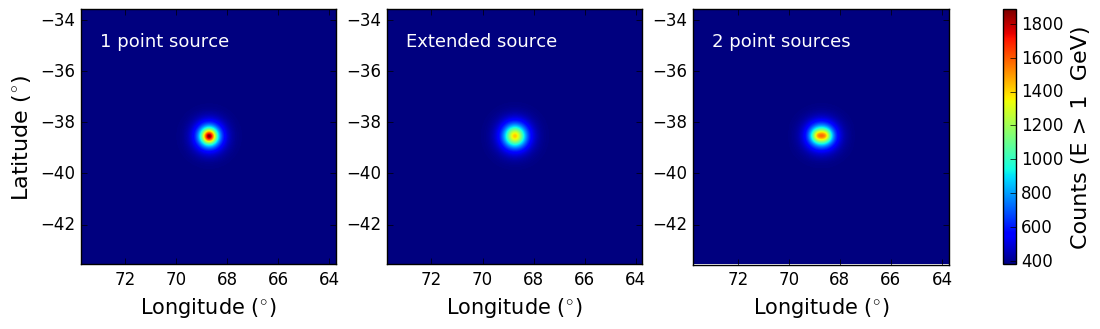

In [233]:
import numpy as np
import matplotlib.pyplot as plt

my_image1 = figdata2
my_image2 = figdata1
my_image3 = figdata3

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (14.0,14.0))

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

im = axes[0].imshow(my_image1, extent=[upx,lowx,lowy,upy])
axes[0].set_xlim(upx,lowx)
axes[0].set_ylim(lowy,upy)
axes[0].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[0].set_ylabel('Latitude ($^{\circ}$)', fontsize = 16)
axes[0].text(73,-35, r'1 point source', color='w', fontsize=13)
clim=im.properties()['clim']
im2 = axes[1].imshow(my_image2, clim=clim, extent=[upx,lowx,lowy,upy])
axes[1].set_xlim(upx,lowx)
axes[1].set_ylim(lowy,upy)
axes[1].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[1].text(73,-35, r'Extended source', color='w', fontsize=13)
im3 = axes[2].imshow(my_image3, clim=clim, extent=[upx,lowx,lowy,upy])
axes[2].set_xlim(upx,lowx)
axes[2].set_ylim(lowy,upy)
axes[2].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[2].text(73,-35, r'2 point sources', color='w', fontsize=13)

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink = 0.235)
cbar.set_label('Counts (E > 1  GeV)', fontsize = 16)


plt.show()

### Now modify the files in order to get a $5 \times 5$ degree patch each time.

Each of the above figures represent a $10^o \times 10^o$ patch of the sky. But we want to keep only the innermost $5 \times 5$ degrees part. 

Actually each of these is a $800 \times 800$ pixels grid (0 to 799 $\times$ 0 to 799). In order to keep the innermost $5 \times 5$ degrees part, we then have to keep pixels 200 to 599 $\times$ 200 to 599. We will do this now.

In [234]:
#red means reduced

red_figdata1 = figdata1[200:600,200:600]
red_figdata2 = figdata2[200:600,200:600]
red_figdata3 = figdata3[200:600,200:600]

#### Also new coordinates

In [235]:
## Define the coordinates of the center of the grid
#latitude and longitue in galactic coordinates 
#longitude in l, latitude in b
# longitude is the x-like coordinate, latitude is the y-like coordinate

#the center is at the position of source J2212.5+0703

centerl = 68.7423
centerb = - 38.5648

#Having the position of the center, we can define the limits in x and y. Remember, the grid is defined as +/- 10 degrees 
#from the center

#First, let's make a choice for the coordinates of the upper left point 
#We define it to be 10 degrees of in each direction 

upx = centerl + 2.5 
upy = centerb + 2.5

#Now, find the other limits

lowx = upx - 5.0
lowy = upy - 5.0

### Plot the new figures

### And now, we also have to stretch the figures because galactic coordinates are not Euclidean

At latitude of $\sim 40$ degrees, the relative size between 1 degree in latitude and 1 degree in longitude is: Latitude $\sim$ 1.305 degrees in longitude.

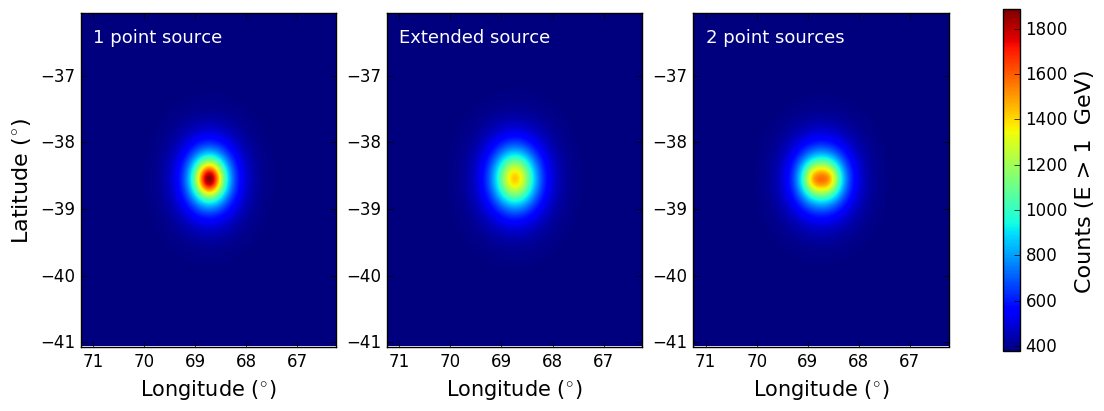

In [236]:
import numpy as np
import matplotlib.pyplot as plt

my_image1 = red_figdata2
my_image2 = red_figdata1
my_image3 = red_figdata3

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (14.0,14.0))

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

im = axes[0].imshow(my_image1, extent=[upx,lowx,lowy,upy], aspect=1.305)
axes[0].set_xlim(upx,lowx)
axes[0].set_ylim(lowy,upy)
axes[0].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[0].set_ylabel('Latitude ($^{\circ}$)', fontsize = 16)
axes[0].text(71,-36.5, r'1 point source', color='w', fontsize=13)
clim=im.properties()['clim']
im2 = axes[1].imshow(my_image2, clim=clim, extent=[upx,lowx,lowy,upy], aspect=1.305)
axes[1].set_xlim(upx,lowx)
axes[1].set_ylim(lowy,upy)
axes[1].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[1].text(71,-36.5, r'Extended source', color='w', fontsize=13)
clim=im.properties()['clim']
im3 = axes[2].imshow(my_image3, clim=clim, extent=[upx,lowx,lowy,upy],aspect =1.305)
axes[2].set_xlim(upx,lowx)
axes[2].set_ylim(lowy,upy)
axes[2].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[2].text(71,-36.5, r'2 point sources', color='w', fontsize=13)

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink = 0.315)
cbar.set_label('Counts (E > 1  GeV)', fontsize = 16)


plt.show()

### Try to keep in square

Now, we want  the figures to be square 

In [237]:
## Define the coordinates of the center of the grid
#latitude and longitue in galactic coordinates 
#longitude in l, latitude in b
# longitude is the x-like coordinate, latitude is the y-like coordinate

#the center is at the position of source J2212.5+0703

centerl = 68.7423
centerb = - 38.5648

#Having the position of the center, we can define the limits in x and y. Remember, the grid is defined as +/- 10 degrees 
#from the center

#First, let's make a choice for the coordinates of the upper left point 
#We define it to be 10 degrees of in each direction 

upx = centerl + 2.5 
upy = centerb + 3.8314/2.0

#Now, find the other limits

lowx = upx - 5.0
lowy = upy - 3.8314

In [238]:
red_sq_figdata1 = red_figdata1[47:353,:]
red_sq_figdata2 = red_figdata2[47:353,:]
red_sq_figdata3 = red_figdata3[47:353,:]

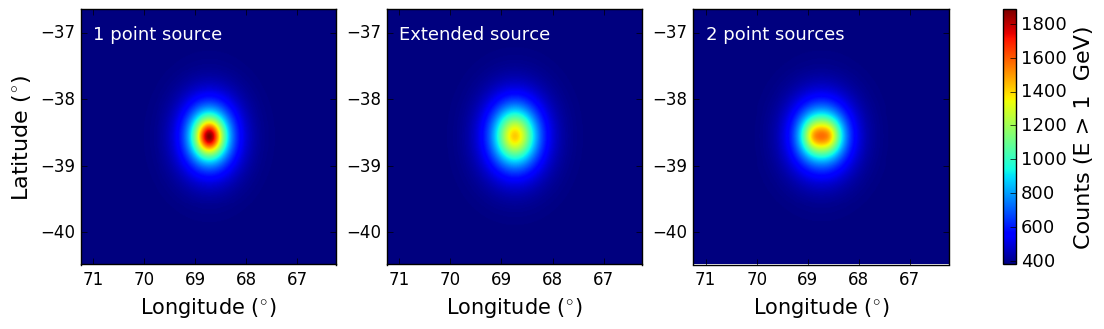

In [239]:
import numpy as np
import matplotlib.pyplot as plt

my_image1 = red_sq_figdata2
my_image2 = red_sq_figdata1
my_image3 = red_sq_figdata3

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (14.0,14.0))

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=13)

im = axes[0].imshow(my_image1,extent=[upx,lowx,lowy,upy],aspect= 1.305)
axes[0].set_xlim(upx,lowx)
axes[0].set_ylim(lowy,upy)
axes[0].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[0].set_ylabel('Latitude ($^{\circ}$)', fontsize = 16)
axes[0].text(71,-37.1, r'1 point source', color='w', fontsize=13)
axes[0].yaxis.get_major_locator().set_params(nbins=4)
clim=im.properties()['clim']
im2 = axes[1].imshow(my_image2, clim=clim, extent=[upx,lowx,lowy,upy], aspect=1.305)
axes[1].set_xlim(upx,lowx)
axes[1].set_ylim(lowy,upy)
axes[1].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[1].text(71,-37.1, r'Extended source', color='w', fontsize=13)
axes[1].yaxis.get_major_locator().set_params(nbins=4)
clim=im.properties()['clim']
im3 = axes[2].imshow(my_image3, clim=clim, extent=[upx,lowx,lowy,upy], aspect=1.305)
axes[2].set_xlim(upx,lowx)
axes[2].set_ylim(lowy,upy)
axes[2].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[2].text(71,-37.1, r'2 point sources', color='w', fontsize=13)
axes[2].yaxis.get_major_locator().set_params(nbins=4)

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink = 0.235)
cbar.set_label('Counts (E > 1  GeV)', fontsize = 16)


plt.show()

### Without stretching actually the figure 

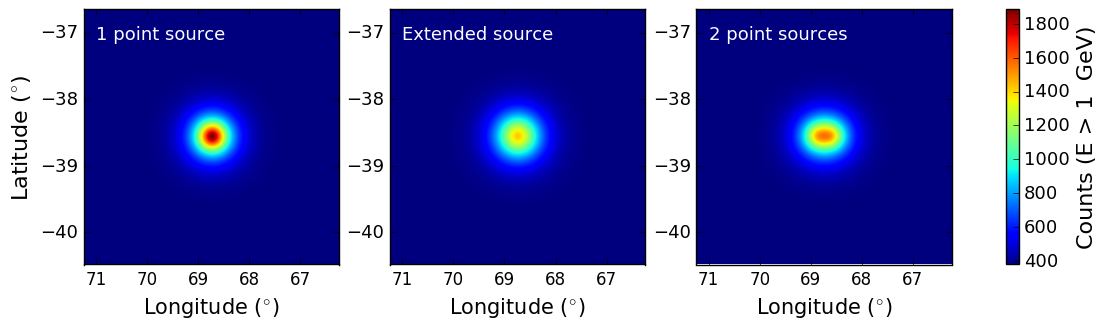

In [240]:
import numpy as np
import matplotlib.pyplot as plt

my_image1 = red_figdata2
my_image2 = red_figdata1
my_image3 = red_figdata3

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (14.0,14.0))

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=13)

im = axes[0].imshow(my_image1,extent=[upx,lowx,lowy,upy],aspect= 1.305)
axes[0].set_xlim(upx,lowx)
axes[0].set_ylim(lowy,upy)
axes[0].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[0].set_ylabel('Latitude ($^{\circ}$)', fontsize = 16)
axes[0].text(71,-37.1, r'1 point source', color='w', fontsize=13)
axes[0].yaxis.get_major_locator().set_params(nbins=4)
clim=im.properties()['clim']
im2 = axes[1].imshow(my_image2, clim=clim, extent=[upx,lowx,lowy,upy], aspect=1.305)
axes[1].set_xlim(upx,lowx)
axes[1].set_ylim(lowy,upy)
axes[1].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[1].text(71,-37.1, r'Extended source', color='w', fontsize=13)
axes[1].yaxis.get_major_locator().set_params(nbins=4)
clim=im.properties()['clim']
im3 = axes[2].imshow(my_image3, clim=clim, extent=[upx,lowx,lowy,upy], aspect=1.305)
axes[2].set_xlim(upx,lowx)
axes[2].set_ylim(lowy,upy)
axes[2].set_xlabel('Longitude ($^{\circ}$)', fontsize = 15)
axes[2].text(71,-37.1, r'2 point sources', color='w', fontsize=13)
axes[2].yaxis.get_major_locator().set_params(nbins=4)

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink = 0.235)
cbar.set_label('Counts (E > 1  GeV)', fontsize = 16)


plt.show()